<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Load data</a></span></li></ul></li><li><span><a href="#Undersampling-techniques" data-toc-modified-id="Undersampling-techniques-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Undersampling techniques</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Label-encoding-for-categorical-variable" data-toc-modified-id="Label-encoding-for-categorical-variable-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span><strong>Label encoding for categorical variable</strong></a></span></li><li><span><a href="#Count-encoding-for-categorical-variables" data-toc-modified-id="Count-encoding-for-categorical-variables-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Count encoding for categorical variables</a></span></li></ul></li></ul></li><li><span><a href="#Oversampling-techniques" data-toc-modified-id="Oversampling-techniques-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Oversampling techniques</a></span></li><li><span><a href="#Under-sampling-with-cross-validation" data-toc-modified-id="Under-sampling-with-cross-validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Under-sampling with cross-validation</a></span></li><li><span><a href="#Over-sampling-with-cross-validation" data-toc-modified-id="Over-sampling-with-cross-validation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Over-sampling with cross-validation</a></span></li><li><span><a href="#Over+Undersampling-methods" data-toc-modified-id="Over+Undersampling-methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Over+Undersampling methods</a></span></li><li><span><a href="#Ensemble-Learning" data-toc-modified-id="Ensemble-Learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ensemble Learning</a></span></li><li><span><a href="#Cost-Sensitive-Learning" data-toc-modified-id="Cost-Sensitive-Learning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cost Sensitive Learning</a></span></li><li><span><a href="#What-is-the-best?" data-toc-modified-id="What-is-the-best?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>What is the best?</a></span></li></ul></div>

# Bank Marketing Undersampling


We've seen the bank marketing dataset is an imbalanced data which means that datasets have many more instances of certain classes than of others, so we need to deal with this very carefully. 

> __Why is imbalanced dataset problem?__
    - Most machine learning algorithms assume balanced distributions. As the minority examples occur rarely, rules to predict the small classes are difficult to find. Samples from the minority class are most often misclassified. 
    
    
> __What is Under-Sampling methods?__
    - Undersampling methods process of __reducing__ the number of samples from the majority class. 
    
There is no consensus in the community regarding which technique should be used with imbalanced datsets. 
Therefore, in this notebook, I will compare the performances of different undersampling techniques and choose which one is the best for the bank marketing dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/BankMarketing'

In [2]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/BankMarketing')

In [3]:
# for the model 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier
)

from sklearn.metrics import (
    roc_auc_score, 
    confusion_matrix
)

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import encoding as ce

# for undersampling
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)


# for oversampling
from sklearn.svm import SVC

from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE
)

# for combination sampling
from imblearn.combine import SMOTEENN, SMOTETomek

# for cross-validation
from imblearn.pipeline import make_pipeline

# for ensemble sampling
from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier
)

### Load data

In [4]:
data = pd.read_csv(path/'cleaned_data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.shape)
data.head()

(41185, 21)


,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,pdays_group
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Not contacted
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Not contacted
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40,Not contacted
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,31-40,Not contacted
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,51-60,Not contacted


In [5]:
# create lists of numerical and categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'O' and var != 'y']
num_vars = [var for var in data.columns if data[var].dtype != 'O' and var != 'y']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 12
The number of numerical variables: 8


In [6]:
def run_RFs(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=39)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    #print('Confusion_matrix: ')
    #print(confusion_matrix(y_train, rf.predict(X_train)))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    #print('Confusion_matrix: ')
    #print(confusion_matrix(y_test, rf.predict(X_test)))
    
    return roc_auc_score(y_test, pred[:, 1])

In [7]:
def run_logit(X_train, X_test, y_train, y_test):
    logit = LogisticRegression(C=0.01, max_iter=1000, random_state=44)
    logit.fit(X_train, y_train)
    
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    #print('Confusion_matrix: ')
    #print(confusion_matrix(y_train, logit.predict(X_train)))
    
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    #print('Confusion_matrix: ')
    #print(confusion_matrix(y_test, logit.predict(X_test)))

## Undersampling techniques

    RandomSampling
    CondensedNearestNeighbour,- takes a lot of time
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours, - takes a lot of time
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
    
    
While performing trial and error, cnn and renn took so long time to perform, so I didn't include them after I got an error. Also, both methods did not improve the performances. 

Also, I realized when I tried to see the differences between categorical encoding methods, both performances look similar (or exactly same) when I used undersampling techniques. So, I will use only label encoding for further experiments. 

In [48]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=1),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=1),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=1),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=1),

    'nm1': NearMiss(
        sampling_strategy='auto',
        version=1,
        n_neighbors=3,
        n_jobs=1),

    'nm2': NearMiss(
        sampling_strategy='auto',
        version=2,
        n_neighbors=3,
        n_jobs=1),
   
    'iht_RF': InstanceHardnessThreshold(
        estimator=RandomForestClassifier(n_estimators=30, max_depth=3, random_state=39),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=1,
        cv=3
    ),
    
    'iht_logit': InstanceHardnessThreshold(
        estimator=LogisticRegression(random_state=0),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=1,
        cv=3
    )
    
}

#### __Label encoding for categorical variable__

In [49]:
# loop to train models with the different under-sampling methods

# to save the results
results_dict = {}
shapes_dict = {}

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1), 
    data['y'],
    test_size=0.3,
    random_state=0
)

# label encoding for categorical variables
ordinal_enc = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_enc.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# set up the scaler for feature scaling because we have KNN based techniques
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

y_train = y_train.map({'no':0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})



# train a model on the original data without under-sampling
# and determine model performance
roc = run_RFs(X_train, X_test, y_train, y_test)

# store results
results_dict['full_data'] = roc
shapes_dict['full_data'] = len(X_train)

print()

# now, we test the different under-samplers
for undersampler in undersampler_dict.keys():
    
    print(undersampler)
    
    # resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
    
    # train model and evaluate performance
    
    # Note that performance returned is using test set, 
    # which was not under-sampled
    
    roc = run_RFs(X_resampled, X_test, y_resampled, y_test)
    
    # store results
    results_dict[undersampler] = roc
    shapes_dict[undersampler] = len(X_resampled)
    
    print()
    
print()

Train set
Random Forests roc-auc: 0.9277391477348833
Test set
Random Forests roc-auc: 0.9301929165098902

random
Train set
Random Forests roc-auc: 0.918630886370392
Test set
Random Forests roc-auc: 0.9190900933678943

tomek
Train set
Random Forests roc-auc: 0.9356610485018332
Test set
Random Forests roc-auc: 0.928639737583096

oss
Train set
Random Forests roc-auc: 0.9367623339431852
Test set
Random Forests roc-auc: 0.9293732933607022

enn
Train set
Random Forests roc-auc: 0.9673882908150533
Test set
Random Forests roc-auc: 0.92669505788196

allknn
Train set
Random Forests roc-auc: 0.9723198833543294
Test set
Random Forests roc-auc: 0.9249251240308828

nm1
Train set
Random Forests roc-auc: 0.8866529730101812
Test set
Random Forests roc-auc: 0.8487124995471879

nm2
Train set
Random Forests roc-auc: 0.9298391000064792
Test set
Random Forests roc-auc: 0.56201041745716

iht_RF
Train set
Random Forests roc-auc: 0.997656679795455
Test set
Random Forests roc-auc: 0.8105648888488152

iht_logit


In [50]:
results_dict

{'full_data': 0.9301929165098902,
 'random': 0.9190900933678943,
 'tomek': 0.928639737583096,
 'oss': 0.9293732933607022,
 'enn': 0.92669505788196,
 'allknn': 0.9249251240308828,
 'nm1': 0.8487124995471879,
 'nm2': 0.56201041745716,
 'iht_RF': 0.8105648888488152,
 'iht_logit': 0.8536468305392947}

In [51]:
shapes_dict

{'full_data': 28829,
 'random': 6522,
 'tomek': 28012,
 'oss': 28010,
 'enn': 25429,
 'allknn': 24963,
 'nm1': 6522,
 'nm2': 6522,
 'iht_RF': 6528,
 'iht_logit': 6522}

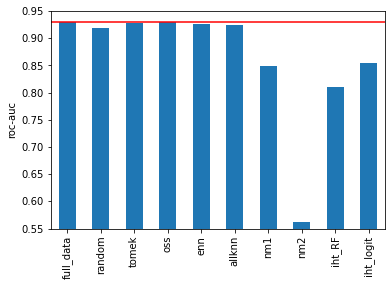

In [54]:
pd.Series(results_dict).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0.55, 0.95)
plt.axhline(results_dict['full_data'], color='r')
plt.show()

None of the different techniques improved performances compared to the baseline model. 

#### Count encoding for categorical variables

In [55]:
# loop to train models with the different under-sampling methods

# to save the results
results_dict_count = {}
shapes_dict_count = {}

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1), 
    data['y'],
    test_size=0.3,
    random_state=0
)

# label encoding for categorical variables
ordinal_enc = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_enc.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# set up the scaler for feature scaling because we have KNN based techniques
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

y_train = y_train.map({'no':0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})



# train a model on the original data without under-sampling
# and determine model performance
roc = run_RFs(X_train, X_test, y_train, y_test)

# store results
results_dict_count['full_data'] = roc
shapes_dict_count['full_data'] = len(X_train)

print()

# now, we test the different under-samplers
for undersampler in undersampler_dict.keys():
    
    print(undersampler)
    
    # resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
    
    # train model and evaluate performance
    
    # Note that performance returned is using test set, 
    # which was not under-sampled
    
    roc = run_RFs(X_resampled, X_test, y_resampled, y_test)
    
    # store results
    results_dict_count[undersampler] = roc
    shapes_dict_count[undersampler] = len(X_resampled)
    
    print()
    
print()

Train set
Random Forests roc-auc: 0.9277391477348833
Test set
Random Forests roc-auc: 0.9301929165098902

random
Train set
Random Forests roc-auc: 0.918630886370392
Test set
Random Forests roc-auc: 0.9190900933678943

tomek
Train set
Random Forests roc-auc: 0.9356610485018332
Test set
Random Forests roc-auc: 0.928639737583096

oss
Train set
Random Forests roc-auc: 0.9367623339431852
Test set
Random Forests roc-auc: 0.9293732933607022

enn
Train set
Random Forests roc-auc: 0.9673882908150533
Test set
Random Forests roc-auc: 0.92669505788196

allknn
Train set
Random Forests roc-auc: 0.9723198833543294
Test set
Random Forests roc-auc: 0.9249251240308828

nm1
Train set
Random Forests roc-auc: 0.8866529730101812
Test set
Random Forests roc-auc: 0.8487124995471879

nm2
Train set
Random Forests roc-auc: 0.9298391000064792
Test set
Random Forests roc-auc: 0.56201041745716

iht_RF
Train set
Random Forests roc-auc: 0.997656679795455
Test set
Random Forests roc-auc: 0.8105648888488152

iht_logit


In [57]:
# used integer encoding for categorical variables
results_dict

{'full_data': 0.9301929165098902,
 'random': 0.9190900933678943,
 'tomek': 0.928639737583096,
 'oss': 0.9293732933607022,
 'enn': 0.92669505788196,
 'allknn': 0.9249251240308828,
 'nm1': 0.8487124995471879,
 'nm2': 0.56201041745716,
 'iht_RF': 0.8105648888488152,
 'iht_logit': 0.8536468305392947}

In [56]:
# used count encoding for categorical variables
results_dict_count

{'full_data': 0.9301929165098902,
 'random': 0.9190900933678943,
 'tomek': 0.928639737583096,
 'oss': 0.9293732933607022,
 'enn': 0.92669505788196,
 'allknn': 0.9249251240308828,
 'nm1': 0.8487124995471879,
 'nm2': 0.56201041745716,
 'iht_RF': 0.8105648888488152,
 'iht_logit': 0.8536468305392947}

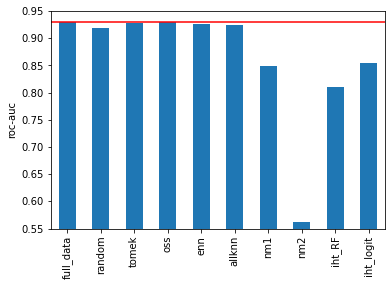

In [58]:
pd.Series(results_dict_count).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0.55, 0.95)
plt.axhline(results_dict_count['full_data'], color='r')
plt.show()

Regardless of methods for feature engineering for categorical variables, none of undersampling techniques did not improve the performances compared to original model. 

However, __RandomUndersampling__ method is the best for this dataset if we choose one of the oversampling methods, because it shows slightly improved performances compared to train (0.918) and test set(0.919). The other methods showed over-fitting. 

## Oversampling techniques

    RandomOverSampler
    SMOTE
    ADASYN
    BorderlineSMOTE
    SVMSMOTE

In [59]:
data['y'].value_counts() / len(data)

no     0.887362
yes    0.112638
Name: y, dtype: float64

In [62]:
oversampler_dict = {
    
    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),
    
    'smote': SMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        n_jobs=1),
    
    'adasyn': ADASYN(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1),
    
    'border1': BorderlineSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=1),
    
    'border2': BorderlineSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5, 
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=1),
    
    'svm': SVMSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=1,
        svm_estimator=SVC(kernel='linear')),
}

In [64]:
# to save the results
results_dict_over = {}
shapes_dict_over = {}

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.3,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_encoding.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)



roc = run_RFs(X_train, X_test, y_train, y_test)

# store results
results_dict_over['full_data'] = roc
shapes_dict_over['full_data'] = len(X_train)

print()

for oversampler in oversampler_dict.keys():
    
    print(oversampler)
    
    # resample
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
    
    # evaluate performance
    roc = run_RFs(X_resampled, X_test, y_resampled, y_test)
    
    # store results
    results_dict_over[oversampler] = roc
    shapes_dict_over[oversampler] = len(X_resampled)
    print()
    
print()

Train set
Random Forests roc-auc: 0.9277391477348833
Test set
Random Forests roc-auc: 0.9301929165098902

random
Train set
Random Forests roc-auc: 0.9164088774140391
Test set
Random Forests roc-auc: 0.9197487533451915

smote
Train set
Random Forests roc-auc: 0.9260793328456076
Test set
Random Forests roc-auc: 0.9172663178315994

adasyn
Train set
Random Forests roc-auc: 0.9125792892868476
Test set
Random Forests roc-auc: 0.91099648829259

border1
Train set
Random Forests roc-auc: 0.9154760551777996
Test set
Random Forests roc-auc: 0.9071299347606679

border2
Train set
Random Forests roc-auc: 0.9230150653314394
Test set
Random Forests roc-auc: 0.9050043284880885

svm
Train set
Random Forests roc-auc: 0.9267960297791376
Test set
Random Forests roc-auc: 0.9130973055756585




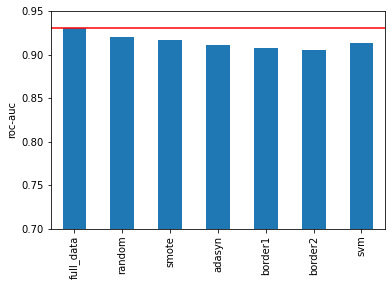

In [68]:
pd.Series(results_dict_over).plot.bar()
plt.ylabel('roc-auc')
plt.ylim(0.70, 0.95)
plt.axhline(results_dict_over['full_data'], color='r')
plt.show()

## Under-sampling with cross-validation

In [ ]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),

    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=1),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=1),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=1),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=1),

    'nm1': NearMiss(
        sampling_strategy='auto',
        version=1,
        n_neighbors=3,
        n_jobs=1),

    'nm2': NearMiss(
        sampling_strategy='auto',
        version=2,
        n_neighbors=3,
        n_jobs=1),
   
    'iht_RF': InstanceHardnessThreshold(
        estimator=RandomForestClassifier(n_estimators=30, max_depth=3, random_state=39),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=1,
        cv=3
    ),
    
    'iht_logit': InstanceHardnessThreshold(
        estimator=LogisticRegression(random_state=0),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=1,
        cv=3
    )
    
}

In [110]:
# function to train random forests and evaluate the performance
# with cross-validation

def run_model(X_train, y_train, undersampler=None):
    
    # set up the classifier
    rf = RandomForestClassifier(
            n_estimators=40, random_state=39, max_depth=3, n_jobs=1
        )
    
    # set up a scaler 
    # (as the oversampling techniques use KNN
    # we put the variables in the same scale)
   
    


    
    # without sampling:
    if not undersampler:

        model = rf
    
    # set up a pipeline with sampling:
    else:
        
        # important to scale before the re-sampler
        # as the many of methods require the variables in 
        # a similar scale
        model = make_pipeline(
            undersampler,
            rf,
        )
        
        
    # When we make a pipeline and then run the training of the model
    # with cross-validation, the procedure works as follows:
    
    # 1) take 2 of the 3 fold as train set
    # 2) resample the 2 fold (aka, the train set)
    # 3) train the model on the resampled data from point 2
    # 4) evaluate performance on the 3rd fold, that was not resampled
    
    # this way, we make sure that we are not evaluating the performance
    # of our classifier on the over-sampled data
    
    cv_results = cross_validate(
        model, # the random forest or the pipeline
        X_train, # the data that will be used in the cross-validation
        y_train, # the target
        scoring="roc_auc", # the metric that we want to evaluate
        cv=3, # the cross-validation fold
    )

    #print(
    #    'Random Forests average precision: {0} +/- {1}'.format(
    #    cv_results['test_score'].mean(), cv_results['test_score'].std()
    #    )
    #)
    
    print('RF roc-auc: {}'.format(cv_results['test_score']))

    return cv_results['test_score']

In [111]:
# now we train several models, with the different oversamplers 
# and with cross-validation

# to save the results
roc_dict_under = {}


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.3,
    random_state=0
)

y_train = y_train.map({'no':0, 'yes': 1})
y_test = y_test.map({'no': 0, 'yes': 1})

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_encoding.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


# train model on data with re-sampling with cross-validation
test_score_under = run_model(X_train, y_train)

# store results

roc_dict_under['full_data'] = test_score

print()


for undersampler in undersampler_dict.keys():
    
    print(undersampler)
    
    # resample, train and evaluate performance
    # with cross-validation
    test_score_under = run_model(X_train, y_train, undersampler_dict[undersampler])
    
    # store results
    roc_dict_under[undersampler] = test_score_under

    print()
    
print()

RF roc-auc: [0.92505813 0.92696325 0.92733915]

random
RF roc-auc: [0.91339636 0.91143204 0.91071958]

tomek
RF roc-auc: [0.92534833 0.92761807 0.92725009]

oss
RF roc-auc: [0.92485542 0.92514    0.92723757]

enn
RF roc-auc: [0.92220293 0.92190151 0.92336643]

allknn
RF roc-auc: [0.91754877 0.91926888 0.91902186]

nm1
RF roc-auc: [0.82610936 0.84190573 0.84777329]

nm2
RF roc-auc: [0.50423277 0.69420722 0.46494041]

iht_RF
RF roc-auc: [0.80390703 0.80934775 0.81578692]

iht_logit
RF roc-auc: [0.84859255 0.8543547  0.85541389]




As we can see above, `tomek`, `oss`, `enn` improved models' performance. 

## Over-sampling with cross-validation

In [105]:
# function to train random forests and evaluate the performance
# with cross-validation

def run_model(X_train, y_train, oversampler=None):
    
    # set up the classifier
    rf = RandomForestClassifier(
            n_estimators=40, random_state=39, max_depth=3, n_jobs=1
        )
    
    
    # without sampling:
    if not oversampler:

        model = rf
    
    # set up a pipeline with sampling:
    else:
        
        # important to scale before the re-sampler
        # as the many of methods require the variables in 
        # a similar scale
        model = make_pipeline(
            oversampler,
            rf,
        )
        
        
    # When we make a pipeline and then run the training of the model
    # with cross-validation, the procedure works as follows:
    
    # 1) take 2 of the 3 fold as train set
    # 2) resample the 2 fold (aka, the train set)
    # 3) train the model on the resampled data from point 2
    # 4) evaluate performance on the 3rd fold, that was not resampled
    
    # this way, we make sure that we are not evaluating the performance
    # of our classifier on the over-sampled data
    
    cv_results = cross_validate(
        model, # the random forest or the pipeline
        X_train, # the data that will be used in the cross-validation
        y_train, # the target
        scoring="roc_auc", # the metric that we want to evaluate
        cv=3, # the cross-validation fold
    )

    #print(
    #    'Random Forests average precision: {0} +/- {1}'.format(
    #    cv_results['test_score'].mean(), cv_results['test_score'].std()
    #    )
    #)
    
    print('RF roc-auc: {}'.format(cv_results['test_score']))

    return cv_results['test_score']

In [106]:
# now we train several models, with the different oversamplers 
# and with cross-validation

# to save the results
roc_dict = {}


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.3,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_encoding.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# train model on data with re-sampling with cross-validation
test_score = run_model(X_train, y_train)

# store results

roc_dict['full_data'] = test_score

print()


for oversampler in oversampler_dict.keys():
    
    print(oversampler)
    
    # resample, train and evaluate performance
    # with cross-validation
    test_score = run_model(X_train, y_train, oversampler_dict[oversampler])
    
    # store results
    roc_dict[oversampler] = test_score

    print()
    
print()

RF roc-auc: [0.92505813 0.92696325 0.92733915]

random
RF roc-auc: [0.91916883 0.91662282 0.9141044 ]

smote
RF roc-auc: [0.91966194 0.91616677 0.91103906]

adasyn
RF roc-auc: [0.91177059 0.91313574 0.90577059]

border1
RF roc-auc: [0.90651817 0.91269713 0.90470004]

border2
RF roc-auc: [0.90520952 0.90721454 0.8994204 ]

svm
RF roc-auc: [0.91196714 0.91550203 0.91206552]




Even though none of oversampling methods improve model's performances compared to the baseline model, we can use `random oversampling`, `SMOTE` or `SVM SMOTE` methods for this dataset. 

## Over+Undersampling methods

In [113]:
comsampler_dict = {
    
    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=1
    ),
    
    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=1
    )
    
}

In [116]:
# function to train random forests and evaluate the performance
# with cross-validation

def run_model(X_train, y_train, comsampler=None):
    
    # set up the classifier
    rf = RandomForestClassifier(
            n_estimators=40, random_state=39, max_depth=3, n_jobs=1
        )
    
    
    # without sampling:
    if not comsampler:

        model = rf
    
    # set up a pipeline with sampling:
    else:
        
        # important to scale before the re-sampler
        # as the many of methods require the variables in 
        # a similar scale
        model = make_pipeline(
            comsampler,
            rf,
        )
        
        
    # When we make a pipeline and then run the training of the model
    # with cross-validation, the procedure works as follows:
    
    # 1) take 2 of the 3 fold as train set
    # 2) resample the 2 fold (aka, the train set)
    # 3) train the model on the resampled data from point 2
    # 4) evaluate performance on the 3rd fold, that was not resampled
    
    # this way, we make sure that we are not evaluating the performance
    # of our classifier on the over-sampled data
    
    cv_results = cross_validate(
        model, # the random forest or the pipeline
        X_train, # the data that will be used in the cross-validation
        y_train, # the target
        scoring="roc_auc", # the metric that we want to evaluate
        cv=3, # the cross-validation fold
    )

    #print(
    #    'Random Forests average precision: {0} +/- {1}'.format(
    #    cv_results['test_score'].mean(), cv_results['test_score'].std()
    #    )
    #)
    
    print('RF roc-auc: {}'.format(cv_results['test_score']))

    return cv_results['test_score']

In [117]:
# now we train several models, with the different oversamplers 
# and with cross-validation

# to save the results
roc_dict_com = {}


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.3,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_encoding.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

# train model on data with re-sampling with cross-validation
test_score = run_model(X_train, y_train)

# store results

roc_dict_com['full_data'] = test_score

print()


for comsampler in comsampler_dict.keys():
    
    print(comsampler)
    
    # resample, train and evaluate performance
    # with cross-validation
    test_score = run_model(X_train, y_train, comsampler_dict[comsampler])
    
    # store results
    roc_dict_com[comsampler] = test_score

    print()
    
print()

RF roc-auc: [0.92505813 0.92696325 0.92733915]

smenn
RF roc-auc: [0.91841412 0.92006143 0.91457118]

smtomek
RF roc-auc: [0.91740294 0.91704718 0.91221557]




None of them improve performance. 

## Ensemble Learning

In [8]:
# function to train adaboost and evaluate the performance

def run_Ada(X_train, X_test, y_train, y_test):
    
    ada = AdaBoostClassifier(n_estimators=50, random_state=39)
    
    ada.fit(X_train, y_train)
    
    print('Train set')
    pred = ada.predict_proba(X_train)
    print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    print('Test set')
    pred = ada.predict_proba(X_test)
    print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    return roc_auc_score(y_test, pred[:, 1])

In [9]:
# function to train ensemble and evaluate the performance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)
    
    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print('ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print('ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    return roc_auc_score(y_test, pred[:, 1])

In [162]:
# ensemble methods (with or without resampling)

ensemble_dict = {
    
    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=1,
        random_state=42
    ),
    
    # bagging of Logistic Regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=42),
        n_estimators=20,
        n_jobs=1,
        random_state=42
    ),
    
    # bagging of Logistic Regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=42),
        n_estimators=24,
        max_samples=1.0, # the number of samples to draw from X to train each base estimator
        max_features=1.0, # the number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=1,
        random_state=42
    ),
    
    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=42
    ),
    
    # bagging + boosting + under_sampling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=1,
        random_state=42
    )
}

In [171]:
# now we train several models, with the different oversamplers 
# and with cross-validation

# to save the results
roc_dict_ensemble = {}


# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1),
    data['y'],
    test_size=0.3,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_encoding.fit(X_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)


# train model and store result
roc = run_RFs(X_train, X_test, y_train, y_test)
roc_dict_ensemble['full_data'] = roc
print()

# train model and store result
roc = run_Ada(X_train, X_test, y_train, y_test)
roc_dict_ensemble['full_data_adaboost'] = roc
print()


for ensemble in ensemble_dict.keys():
    
    print(ensemble)
    
    # train model and store result
    roc = run_ensemble(ensemble_dict[ensemble], X_train, X_test, y_train, y_test)
    roc_dict_ensemble[ensemble] = roc
    print()
    
print()

Train set
Random Forests roc-auc: 0.9277391477348833
Test set
Random Forests roc-auc: 0.9301929165098902

Train set
AdaBoost roc-auc: 0.9396551143064831
Test set
AdaBoost roc-auc: 0.9391433943226207

balancedRF
Train set
ensembleBoost roc-auc: 0.9225207876853889
Test set
ensembleBoost roc-auc: 0.9286485294113759

bagging
Train set
ensembleBoost roc-auc: 0.9277528565106874
Test set
ensembleBoost roc-auc: 0.9264734773677187

balancedbagging
Train set
ensembleBoost roc-auc: 0.9310676816773804
Test set
ensembleBoost roc-auc: 0.9295810250928033

rusboost
Train set
ensembleBoost roc-auc: 0.9344752479717248
Test set
ensembleBoost roc-auc: 0.9344148449954401

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9413314169352291
Test set
ensembleBoost roc-auc: 0.9413998864598176




`RUSBoost` and `EasyEnsemble` look great. 

## What is the best?

In [152]:
# oversampling with cross validation
t_oversampling = pd.DataFrame(roc_dict)
t_oversampling = t_oversampling.T
t_oversampling.columns = ['roc_auc1', 'roc_auc2', 'roc_auc3']
t_oversampling['sum'] = t_oversampling['roc_auc1'] + t_oversampling['roc_auc2'] + t_oversampling['roc_auc3']
t_oversampling['mean'] = t_oversampling['sum'] / 3

In [153]:
# undersampling with cross validation

t_undersampling = pd.DataFrame(roc_dict_under)
t_undersampling = t_undersampling.T
t_undersampling.columns = ['roc_auc1', 'roc_auc2', 'roc_auc3']
t_undersampling['sum'] = t_undersampling['roc_auc1'] + t_undersampling['roc_auc2'] + t_undersampling['roc_auc3']
t_undersampling['mean'] = t_undersampling['sum']/3

In [154]:
# over- and under combining sampling with cross validation
t_comsampling = pd.DataFrame(roc_dict_com)
t_comsampling = t_comsampling.T
t_comsampling.columns = ['roc_auc1', 'roc_auc2', 'roc_auc3']
t_comsampling['sum'] = t_comsampling['roc_auc1'] + t_comsampling['roc_auc2'] + t_comsampling['roc_auc3']
t_comsampling['mean'] = t_comsampling['sum']/3

In [184]:
# ensemble sampling
t_ensemble = pd.DataFrame.from_dict(roc_dict_ensemble, orient='index')
t_ensemble.columns = ['roc_auc score']

In [155]:
t_oversampling

,roc_auc1,roc_auc2,roc_auc3,sum,mean
full_data,0.925058,0.926963,0.927339,2.779361,0.926454
random,0.919169,0.916623,0.914104,2.749896,0.916632
smote,0.919662,0.916167,0.911039,2.746868,0.915623
adasyn,0.911771,0.913136,0.905771,2.730677,0.910226
border1,0.906518,0.912697,0.904700,2.723915,0.907972
border2,0.905210,0.907215,0.899420,2.711844,0.903948
svm,0.911967,0.915502,0.912066,2.739535,0.913178


In [156]:
t_undersampling

,roc_auc1,roc_auc2,roc_auc3,sum,mean
full_data,0.925058,0.926963,0.927339,2.779361,0.926454
random,0.913396,0.911432,0.910720,2.735548,0.911849
tomek,0.925348,0.927618,0.927250,2.780216,0.926739
oss,0.924855,0.925140,0.927238,2.777233,0.925744
enn,0.922203,0.921902,0.923366,2.767471,0.922490
allknn,0.917549,0.919269,0.919022,2.755840,0.918613
nm1,0.826109,0.841906,0.847773,2.515788,0.838596
nm2,0.504233,0.694207,0.464940,1.663380,0.554460
iht_RF,0.803907,0.809348,0.815787,2.429042,0.809681
iht_logit,0.848593,0.854355,0.855414,2.558361,0.852787


In [157]:
t_comsampling

,roc_auc1,roc_auc2,roc_auc3,sum,mean
full_data,0.925058,0.926963,0.927339,2.779361,0.926454
smenn,0.918414,0.920061,0.914571,2.753047,0.917682
smtomek,0.917403,0.917047,0.912216,2.746666,0.915555


In [185]:
t_ensemble

,roc_auc score
full_data,0.930193
full_data_adaboost,0.939143
balancedRF,0.928649
bagging,0.926473
balancedbagging,0.929581
rusboost,0.934415
easyEnsemble,0.941400


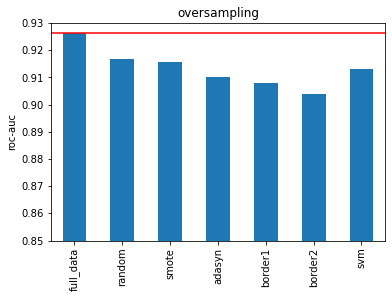

In [158]:
pd.Series(t_oversampling['mean']).plot.bar()
plt.title('oversampling')
plt.axhline(t_oversampling['mean'][0], color='r')
plt.ylim(0.85, 0.93)
plt.ylabel('roc-auc')
plt.show()

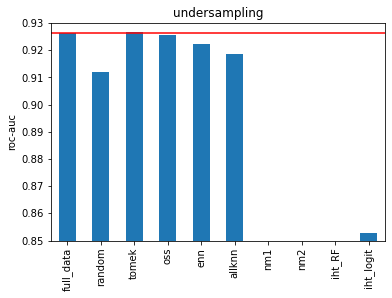

In [159]:
pd.Series(t_undersampling['mean']).plot.bar()
plt.title('undersampling')
plt.axhline(t_undersampling['mean'][0], color='r')
plt.ylim(0.85, 0.93)
plt.ylabel('roc-auc')
plt.show()

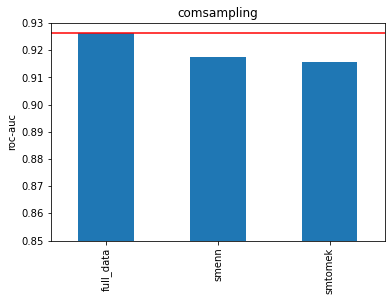

In [160]:
pd.Series(t_comsampling['mean']).plot.bar()
plt.title('comsampling')
plt.axhline(t_comsampling['mean'][0], color='r')
plt.ylim(0.85, 0.93)
plt.ylabel('roc-auc')
plt.show()

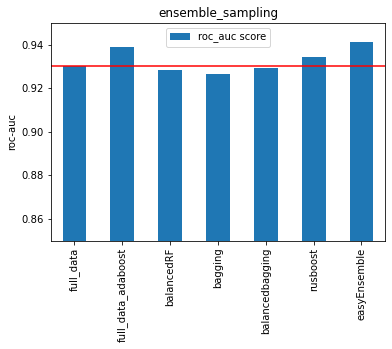

In [193]:
t_ensemble.plot.bar()
plt.title('ensemble_sampling')
plt.axhline(t_ensemble['roc_auc score'][0], color='r')
plt.ylim(0.85, 0.95)
plt.ylabel('roc-auc')
plt.show()

As we can see, `tomek` (undersampling method) improved perfomance. 

Also, by using ensemble sampling methods, we found `easyEnsemble` shows improved performance. 